### DATA 620

### Assignment 8: High Frequency Words

Keith Folsom  
10/22/2017 

### Assignment Overview:

1. Choose a corpus of interest. 
2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus? 
4. Identify the 200 highest frequency words in this corpus. 
5. Create a graph that shows the relative frequency of these 200 words. 
6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 


In [63]:
import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns
import re
import string
import numpy as np

plot.rcParams['figure.figsize'] = (21, 14)

#### Download the necessary NLTK content

In [64]:
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\kfolsom\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kfolsom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kfolsom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kfolsom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1.  Choose a corpus of interest.  
For this assignment, load the Inaugural Address Corpus as the corpus of interest.

Gather some high level statistics on the raw corpous.  No normalization has been applied yet.

In [65]:
total_files = len(inaugural.fileids())
total_chars = len(inaugural.raw())
total_words = len(inaugural.words())
total_sentences = len(inaugural.sents())

In [66]:
print("Inaugural Corpus: {} files".format(total_files))
print("Total Characters = {}".format(total_chars))
print("Total Words = {}".format(total_words))
print("Total Sentences = {}".format(total_sentences))

Inaugural Corpus: 56 files
Total Characters = 772915
Total Words = 145735
Total Sentences = 4868


Statistics about each file in the corpus.

In [67]:
print('Total Words  Avg Word Len  Avg Sentence Len Word Diversity       Corpus')
print('-----------------------------------------------------------------------')

for fileid in inaugural.fileids():
    num_chars = len(inaugural.raw(fileid))  
    num_words = len(inaugural.words(fileid))
    num_sents = len(inaugural.sents(fileid))
    num_vocab = len(set(w.lower() for w in inaugural.words(fileid)))
   
    print(' %6s      %8s      %8s %15s %30s' 
          %(num_words, round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid))

Total Words  Avg Word Len  Avg Sentence Len Word Diversity       Corpus
-----------------------------------------------------------------------
   1538             6            64               3            1789-Washington.txt
    147             5            37               2            1793-Washington.txt
   2585             5            70               3                 1797-Adams.txt
   1935             5            46               3             1801-Jefferson.txt
   2384             5            53               3             1805-Jefferson.txt
   1265             6            60               2               1809-Madison.txt
   1304             5            40               2               1813-Madison.txt
   3693             5            30               4                1817-Monroe.txt
   4909             5            38               4                1821-Monroe.txt
   3150             6            43               3                 1825-Adams.txt
   1208             6     

### 2.  How many total unique words are in the corpus?

For this question, we're going to consider a word as the set of characters greater than length 1 and is non-numeric.  Stopwords will be included in the count, outside of single letter stopwords.  Some normalization is applied such as removal of punctuation and case forced to lowercase.  Lemmatized versus non-lemmatized words will also be examined below.

In [68]:
inaugural_corpus = nltk.corpus.inaugural

words = [word.lower() for word in inaugural_corpus.words()]

# remove special characters
pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
words = filter(None, [pattern.sub('', token) for token in words])

words = [word for word in words if len(word) > 1]
words = [word for word in words if not word.isnumeric()]

__Total Unique Words:__

In [69]:
print(len(set(words)))

8975


In [70]:
words[1:10]

['citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of']

If Lemmatization is applied, the number of total unique words drops slighlty.

In [71]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

words_lem = [wnl.lemmatize(word) for word in words]


__Total Unique Words with Lemmatization__


In [72]:
print(len(set(words_lem)))

7957


In [73]:
words_lem[1:10]

['citizen', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of']

In [74]:
# What's the difference (word count 8975 vs. 7957)?  
# Lemmatization seems to have addressed the plural form of the words when it appears
set(words) - set(words_lem)

{'entanglements',
 'minds',
 'paths',
 'adversaries',
 'headsprings',
 'reaches',
 'ambassadors',
 'shrinks',
 'remarks',
 'mountains',
 'hurricanes',
 'purports',
 'chances',
 'adventurers',
 'attitudes',
 'tools',
 'cereals',
 'ears',
 'rulers',
 'enjoyments',
 'adjustments',
 'cities',
 'steamers',
 'prayers',
 'ordinances',
 'hungers',
 'incapacities',
 'potentates',
 'deficits',
 'decrees',
 'designs',
 'kansas',
 'loves',
 'speeches',
 'cares',
 'brothers',
 'leads',
 'statistics',
 'commissioners',
 'throes',
 'removals',
 'prophets',
 'incomes',
 'houses',
 'women',
 'courts',
 'subterfuges',
 'opportunities',
 'credits',
 'sufferings',
 'lawgivers',
 'empires',
 'congratulations',
 'produces',
 'incumbents',
 'jews',
 'errors',
 'courses',
 'exertions',
 'trumpets',
 'outlays',
 'carries',
 'incidents',
 'dreams',
 'impresses',
 'missions',
 'arms',
 'leaves',
 'fortunes',
 'meets',
 'influences',
 'isles',
 'offers',
 'tells',
 'chords',
 'boundaries',
 'activities',
 'comiti

In [75]:
# we'll go with the lemmatized version
words = words_lem

### 3.  Taking the most common words, how many unique words represent half of the total words in the corpus? 

In [76]:
# build the frequency distribution 
fdist = nltk.FreqDist(words)

In [77]:
# create a dataframe with words and their counts
fdist_df = pd.DataFrame(fdist.most_common(),columns=['word','count'])

fdist_df.head()

,word,count
0,the,9906
1,of,6986
2,and,5139
3,to,4432
4,in,2749


To find the number of unique words which represent half of the total words in the corpus, use the number of words which have been stored through the normalization process in the variable `words`.

In [78]:
# calculate the cumulative sum of the words based on their frequency
fdist_df['cumulative_count'] = fdist_df['count'].cumsum()

# using len(words)/2 as the threshold 
result = fdist_df[fdist_df.cumulative_count < (len(words)/2)]

In [79]:
print("Number of unique words representing half of the total words = {}".format(len(result)))

Number of unique words representing half of the total words = 56


#### It takes 56 of the most common words to represent half of the total words in the corpus.

In [80]:
result

,word,count,cumulative_count
0,the,9906,9906
1,of,6986,16892
2,and,5139,22031
3,to,4432,26463
4,in,2749,29212
5,our,2058,31270
6,it,1932,33202
7,that,1726,34928
8,we,1625,36553
9,be,1460,38013


### 4.  Identify the 200 highest frequency words in this corpus.

In [81]:
# with pandas

fdist200_df = pd.DataFrame(fdist.most_common(200),columns=['word','count'])

# not below that "a" is a word.  
# Assuming here that this is a result of lemmatization since all single-letter words were 
# removed

fdist200_df['pct_occurrence'] =  fdist200_df['count']/len(words) 

fdist200_df.head(200)

,word,count,pct_occurrence
0,the,9906,0.076842
1,of,6986,0.054191
2,and,5139,0.039864
3,to,4432,0.034380
4,in,2749,0.021324
5,our,2058,0.015964
6,it,1932,0.014987
7,that,1726,0.013389
8,we,1625,0.012605
9,be,1460,0.011325


### 5.  Create a graph that shows the relative frequency of these 200 words. 

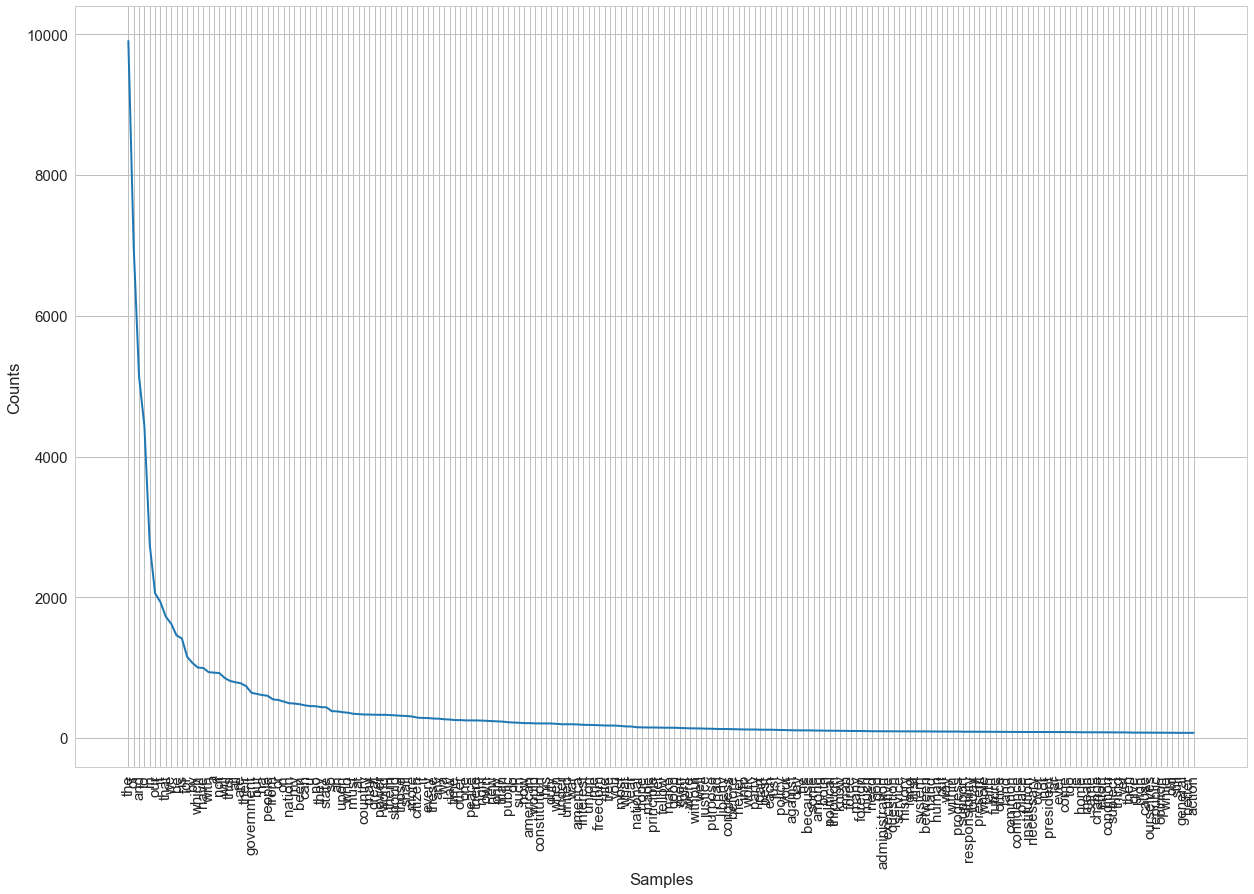

In [82]:
fdist.plot(200,cumulative=False)

Similar graph but limited to the top 100 words for more readability.

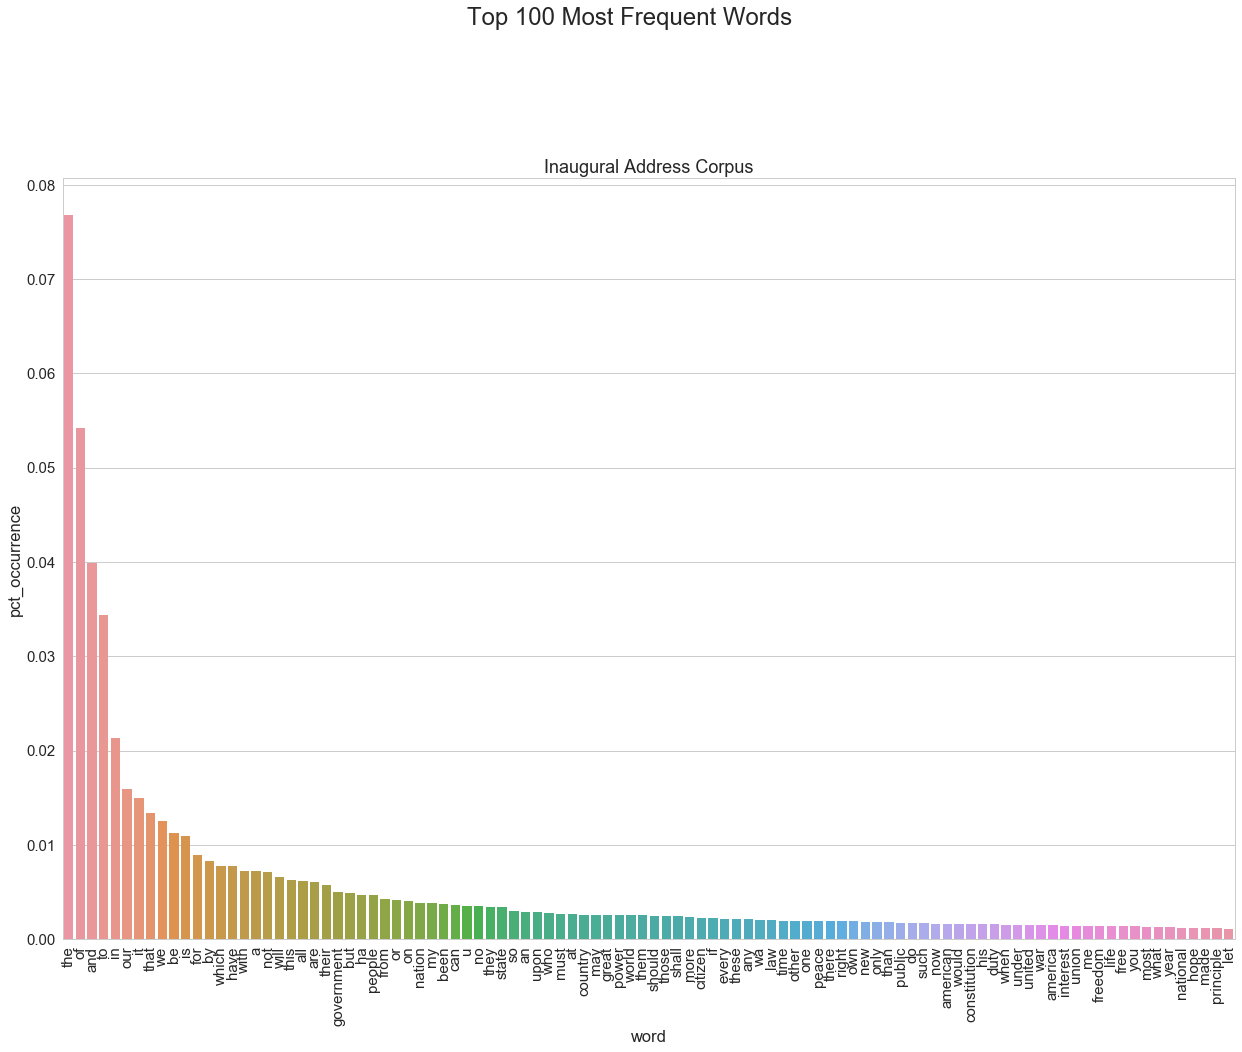

In [83]:
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=1.5)

plot.xlabel("Word")
plot.ylabel("% Relative Frequency")
plot.suptitle("Top 100 Most Frequent Words", y=1.05, fontsize=24)
plot.title("Inaugural Address Corpus", fontsize=18)
plot.xticks(rotation=90)

sns.barplot(x="word", y="pct_occurrence", data=fdist200_df[:100]);

### 6.  Does the observed relative frequency of these words follow Zipf’s law? Explain

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word. Rank-frequency distribution is an inverse relation. (Source Wikipedia)

Yes, we can see Zipf's law directly with these data.  The frequency distribution graph above reflects the inverse relationship among higher ranked words and their occurencese as compared to lower ranked words.  A steep drop off is seen from left to right, with the higher frequency words starting to the left.

In the Inaugural Address Corpus text, "the" is the most frequently occurring word which accounts for nearly 7.7% of all word occurrences (9,906 out of approximately 128,914 words). The second-place word "of" accounts for slightly over 5.4% of words with 6,986 occurrences.  This is not exactly in line with Zipf's law which would be more expected in the range of close to 4%; however, it is directionally similar to the expected inverse relationship per Zipf's law.  The difference observed in this exercise could be due to the normalization that was applied to the corpus.

In [84]:
# Recheck numbers above using minimal normalization; no numbers and apply lowercasing only
words2 = [w for w in inaugural.words() if w.isalpha()]
words2 = [w.lower() for w in words2]

In [85]:
# build the frequency distribution 
fdist2 = nltk.FreqDist(words2)

fdist2.N() 

132124

In [86]:
the = fdist2['the']/fdist2.N()  * 100
of = fdist2['of']/fdist2.N()  * 100

In [87]:
print("'the' occurs {}% while 'of' occurs {}%".format(round(the,1), round(of, 1)))

'the' occurs 7.5% while 'of' occurs 5.3%


The results look very similar to the numbers noted above using more normalization.

### 7.  In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 

This corpus shows a slightly deviation from what might be the expected frequencies of the top words based on Zipf's law.  However, the inverse relationship is still seen, as observed in the relative frequency plot.  But, generally, the words will differ among corpora, but the inverse relationship between frequency and a words rank in the corresponding frequency table should be very similar across all corpora. 


In [88]:
# FreqDist Notes

# fdist.N() = total words
# fdist.keys() = all words
# fdist['nature'] = occurrences of a certain word
# fdist.freq('nature') = frequency of a word
# fdist.max()  = most frequent
